In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
rent_df = pd.read_csv("House_Rent_Dataset.csv")


### Exploratory Data Analysis (EDA)

In [3]:
rent_df.sample(5)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3975,2022-07-06,4,100000,3300,Ground out of 14,Carpet Area,"Vittal Rao Nagar, Hitech City",Hyderabad,Semi-Furnished,Family,4,Contact Agent
1024,2022-06-30,3,140000,1000,3 out of 7,Carpet Area,Juhu,Mumbai,Semi-Furnished,Family,3,Contact Agent
152,2022-05-10,2,5000,1000,Ground out of 2,Carpet Area,Hindmotor,Kolkata,Unfurnished,Bachelors,1,Contact Owner
3232,2022-06-29,1,15000,1300,Ground out of 2,Super Area,Anna Nagar,Chennai,Furnished,Bachelors,2,Contact Owner
1064,2022-07-06,2,100000,800,1 out of 5,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors/Family,2,Contact Agent


In [4]:
#Checking the Shape of the dataset
rent_df.shape

(4746, 12)

In [5]:
rent_df["Floor"]=rent_df["Floor"].apply(lambda a: a.split()[0])
rent_df["Floor"]

0       Ground
1            1
2            1
3            1
4            1
         ...  
4741         3
4742         1
4743         3
4744        23
4745         4
Name: Floor, Length: 4746, dtype: object

In [6]:
# Droping unwanted columns from dataset

rent_df = rent_df.drop(columns=['Posted On', 'Area Locality'], axis=1, inplace=False)
rent_df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [7]:
#Checking all the Columns in the Dataset
rent_df.columns


Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [8]:
rent_df.shape

(4746, 10)

# Rename columns (Removing spaces)
rent_df.rename(columns={
    "Area Type": "AreaType",
    "Area Locality": "Locality",
    "City": "City",
    "Furnishing Status": "FurnishingStatus",
    "Tenant Preferred": "TenantPreferred",
    "Point of Contact": "ContactInfo"
}, inplace=True)

# Verify the changes
print("Updated Column Names:", rent_df.columns.tolist())


In [9]:
#Information about the Dataset
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


In [10]:
rent_df.describe()


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
rent_df.nunique()


BHK                    6
Rent                 243
Size                 615
Floor                 54
Area Type              3
City                   6
Furnishing Status      3
Tenant Preferred       3
Bathroom               8
Point of Contact       3
dtype: int64

In [12]:
#Checking if there is any Null value present in the Dataset?
rent_df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [13]:
#Checking if there is any Duplicate value present in the Dataset?
rent_df.duplicated().sum()

95

In [14]:
#Checking Mean, Median, Maximum & Minimum House Rents

print("Mean House Rent:", round(rent_df["Rent"].mean()))

print("Median House Rent:", round(rent_df["Rent"].median()))

print("Highest House Rent:", round(rent_df["Rent"].max()))

print("Lowest House Rent:", round(rent_df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


In [15]:
#5 Highest House Rents present in the Dataset

rent_df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [16]:
#5 Lowest House Rents present in the Dataset

rent_df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

## Data visualization


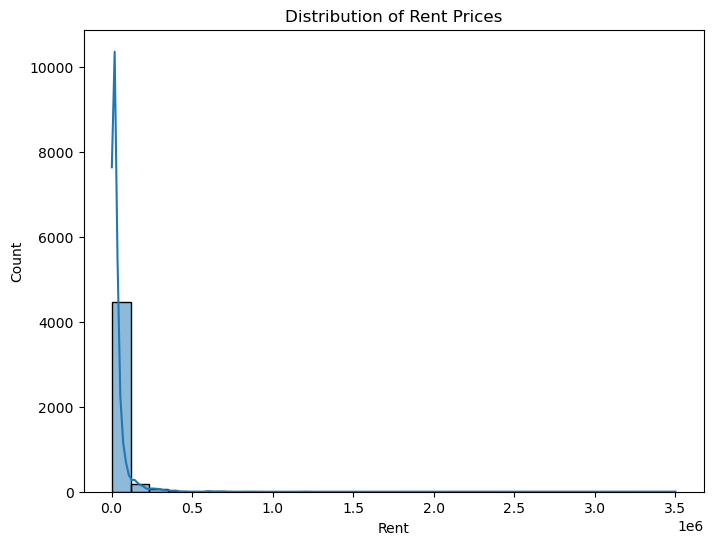

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(rent_df['Rent'], bins=30, kde=True)
plt.title('Distribution of Rent Prices')
plt.show()

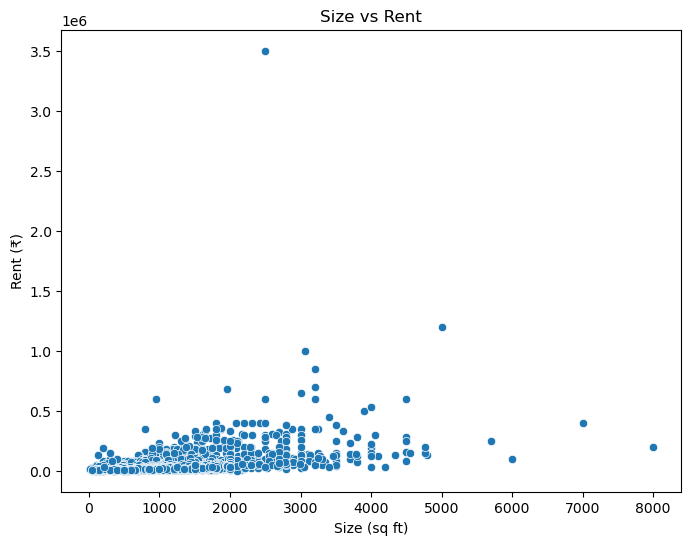

In [18]:
# Relationship between Size and Rent
plt.figure(figsize=(8,6))
sns.scatterplot(x=rent_df['Size'], y=rent_df['Rent'])
plt.title("Size vs Rent")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (₹)")
plt.show()


#### Bar Plot for Number of House in Each City which is Available for Rent


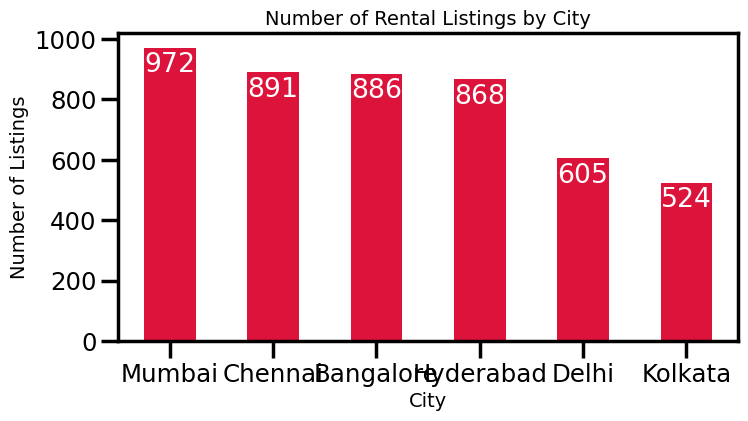

In [19]:
# Set Seaborn style for better visuals
sns.set_context("poster", font_scale=0.8)
plt.figure(figsize=(8, 4))

# Create bar plot for city-wise rental listings
ax = rent_df["City"].value_counts().plot(kind='bar',
                                         color="crimson",
                                         rot=0)

# Annotate the bars with count values
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + 0.25, p.get_height() - 100),
                ha='center',
                va='bottom',
                color='white')

# Add labels and title
plt.xlabel("City", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)
plt.title("Number of Rental Listings by City", fontsize=14)
plt.show()


#### Bar Plot on Different Types of Furnishing Status

Text(0.5, 1.0, 'Distribution of Furnishing Status')

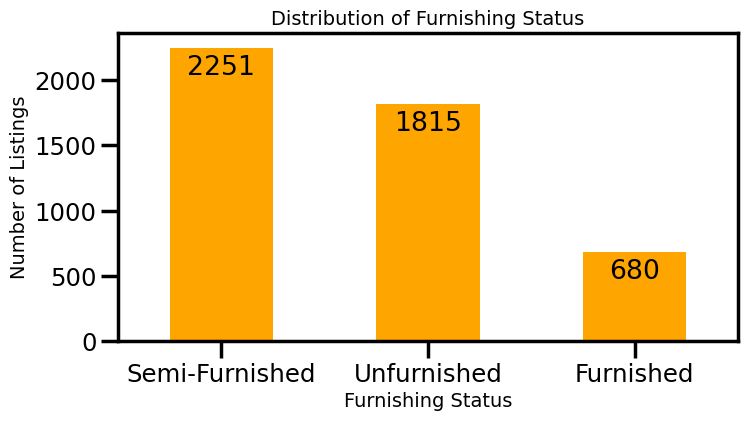

In [20]:
# Set Seaborn style for better visuals
sns.set_context("poster", font_scale=0.8)
plt.figure(figsize=(8,4))  # Keeping the same size as city-wise visualization

# Create bar plot for furnishing status
ax = rent_df["Furnishing Status"].value_counts().plot(kind='bar',
                                                      color="orange",
                                                      rot=0)

# Annotate each bar with count values
for p in ax.patches:
    ax.annotate(int(p.get_height()),  
                (p.get_x() + 0.25, p.get_height() - 250),  
                ha='center',  
                va='bottom',  
                color='black')

# Add labels and title
plt.xlabel("Furnishing Status", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)
plt.title("Distribution of Furnishing Status", fontsize=14)

#### Bar Plot on Different Types of Tenant Preferred



Text(0.5, 1.0, '👥 Tenant Preference Distribution')

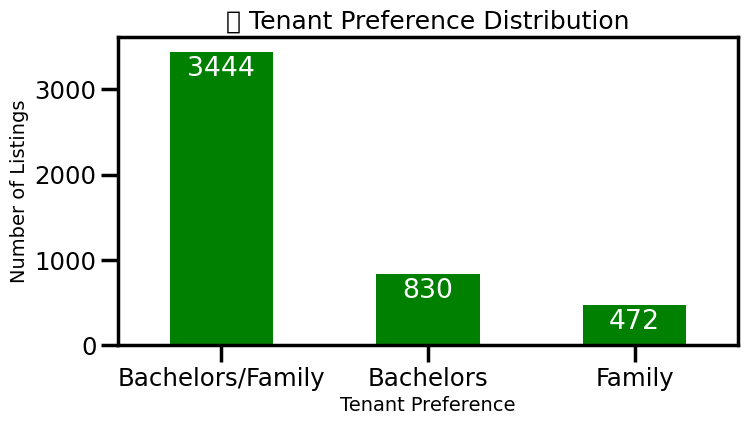

In [21]:
# Set Seaborn style for better visuals
sns.set_context("poster", font_scale=0.8)
plt.figure(figsize=(8,4))  # Keeping the same size as previous visualizations

# Create bar plot for tenant preference
ax = rent_df["Tenant Preferred"].value_counts().plot(kind='bar',
                                                      color="green",
                                                      rot=0)

# Annotate each bar with count values
for p in ax.patches:
    ax.annotate(int(p.get_height()),  
                (p.get_x() + 0.25, p.get_height() - 350),  
                ha='center',  
                va='bottom',  
                color='white')

# Add labels and title
plt.xlabel("Tenant Preference", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)
plt.title("👥 Tenant Preference Distribution", fontsize=18)

#### Pie Plot on Cities to check the distribution

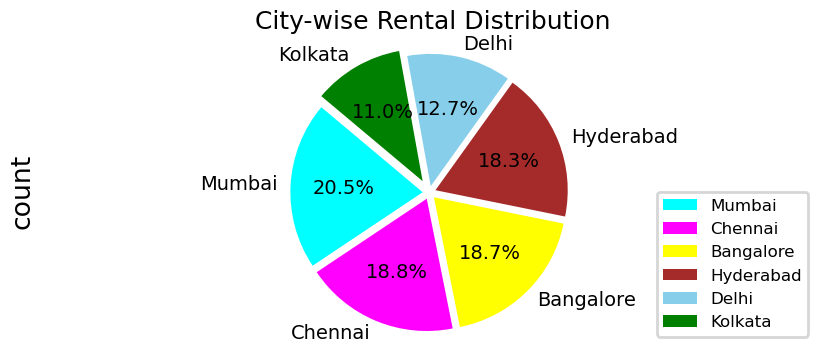

In [22]:
# Set figure size
plt.figure(figsize=(10,4))

# Count the number of listings per city
counts = rent_df["City"].value_counts()

# Define explode effect for emphasis
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.1)  
colors = ['cyan', 'magenta', 'yellow', 'brown', 'skyblue', 'green']

# Create pie chart
counts.plot(kind='pie',
            colors=colors,
            explode=explode,
            autopct='%1.1f%%',
            startangle=140,
            textprops={'fontsize': 14, 'color': 'black'})

# Make the chart circular
plt.axis('equal')

# Add legend for city labels
plt.legend(labels=counts.index, loc="best", fontsize=12)
plt.title(" City-wise Rental Distribution", fontsize=18)
plt.show()

#### Scatter Plot on House Rents vs House Sizes

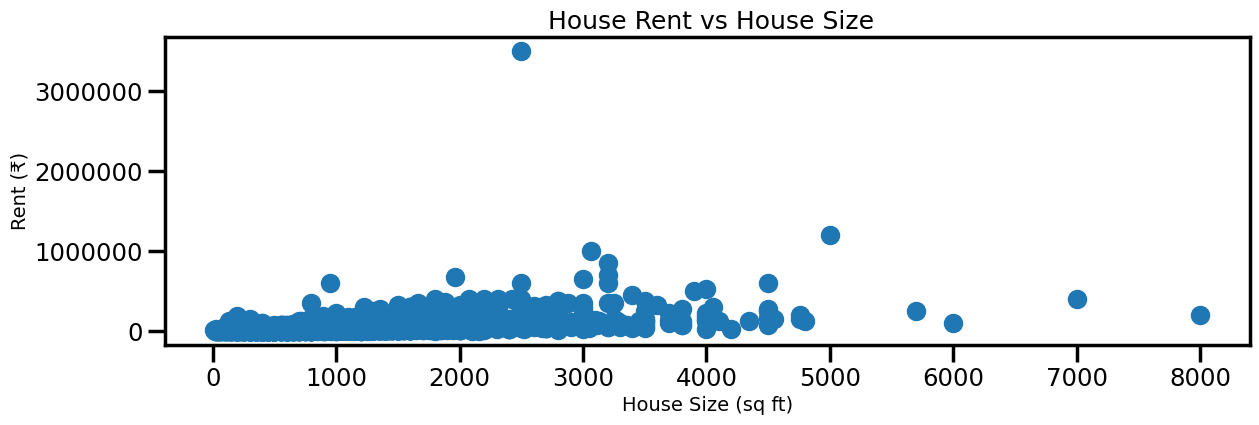

In [23]:
# Set figure size
plt.figure(figsize=(14,4))

# Display large numbers in plain format
plt.ticklabel_format(style='plain')

# Create scatter plot
plt.scatter(rent_df["Size"], rent_df["Rent"])

# Add labels and title
plt.xlabel("House Size (sq ft)", fontsize=14)
plt.ylabel("Rent (₹)", fontsize=14)
plt.title(" House Rent vs House Size", fontsize=18)
plt.show()

#### Relationship between House Rent vs House Sizes

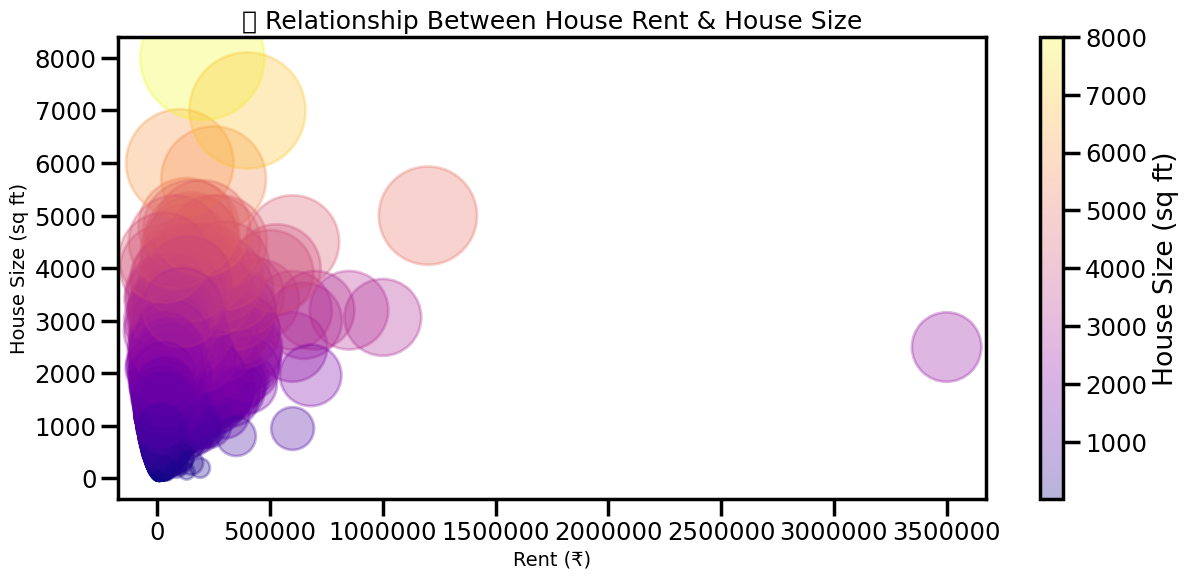

In [24]:
x = rent_df["Rent"]   # X-axis: Rent Price
y = rent_df["Size"]   # Y-axis: House Size
colors = rent_df["Size"]  # Color based on house size
sizes = rent_df["Size"]   # Size of points based on house size

# Set figure size
plt.figure(figsize=(14, 6))

# Display large numbers in plain format
plt.ticklabel_format(style='plain')

# Create scatter plot with color mapping
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='plasma')

# Add color bar to show size variation
plt.colorbar(label="House Size (sq ft)")

# Add labels and title
plt.xlabel("Rent (₹)", fontsize=14)
plt.ylabel("House Size (sq ft)", fontsize=14)
plt.title("🏠 Relationship Between House Rent & House Size", fontsize=18)
plt.show()


#### Bar Plot for City vs House Rent

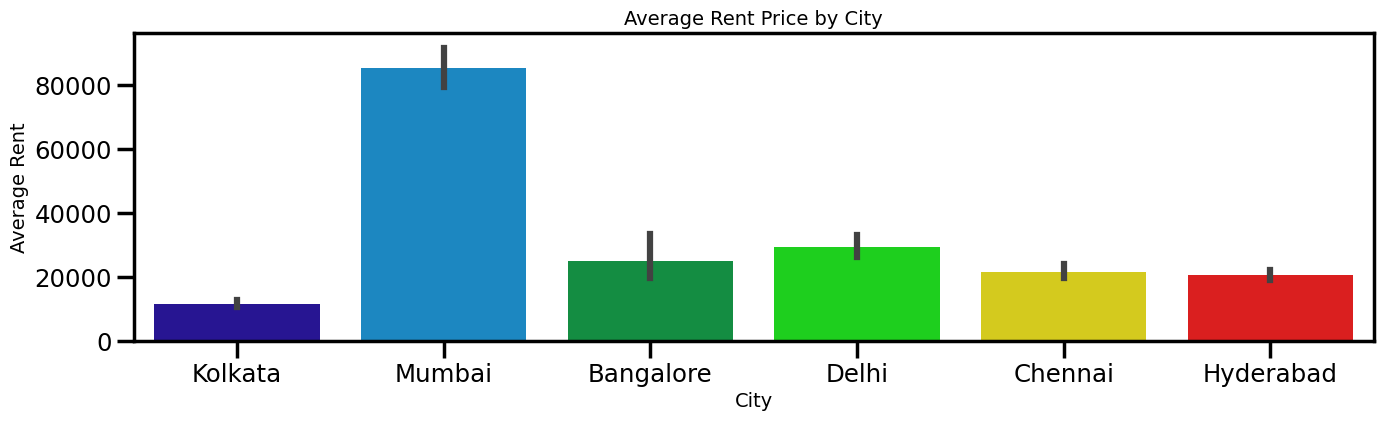

In [25]:
# Set figure size
plt.figure(figsize=(16, 4))

# Create bar plot of Average Rent by City
sns.barplot(x=rent_df["City"], y=rent_df["Rent"], palette="nipy_spectral")

# Add labels and title
plt.xlabel("City", fontsize=14)
plt.ylabel("Average Rent", fontsize=14)
plt.title("Average Rent Price by City", fontsize=14)
plt.show()

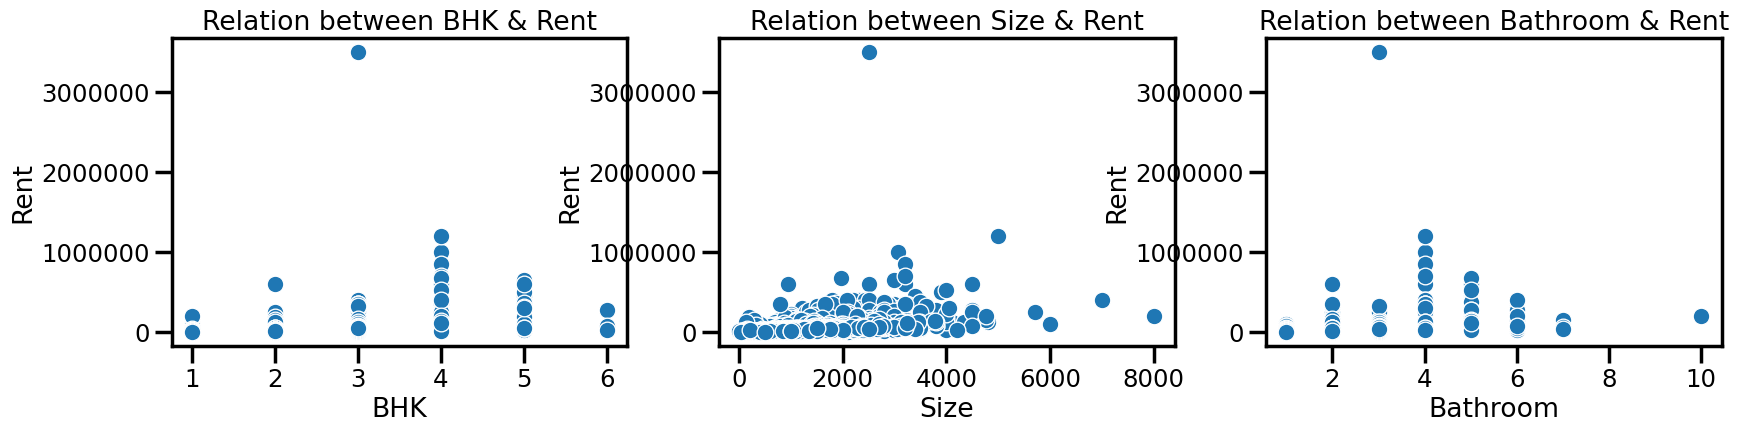

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.scatterplot(x=rent_df["BHK"], y=rent_df["Rent"], ax=axs[0])
axs[0].set_title("Relation between BHK & Rent")

sns.scatterplot(x=rent_df["Size"], y=rent_df["Rent"], ax=axs[1])
axs[1].set_title("Relation between Size & Rent")

sns.scatterplot(x=rent_df["Bathroom"], y=rent_df["Rent"], ax=axs[2])
axs[2].set_title("Relation between Bathroom & Rent")


# Formatting y-axis ticks to display only integers
for ax in axs.flat:
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.show()

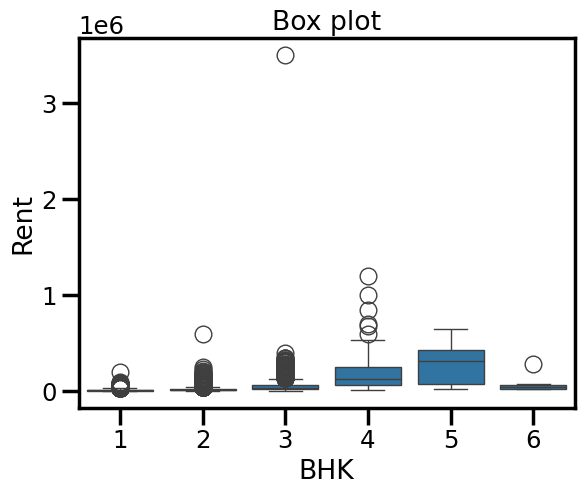

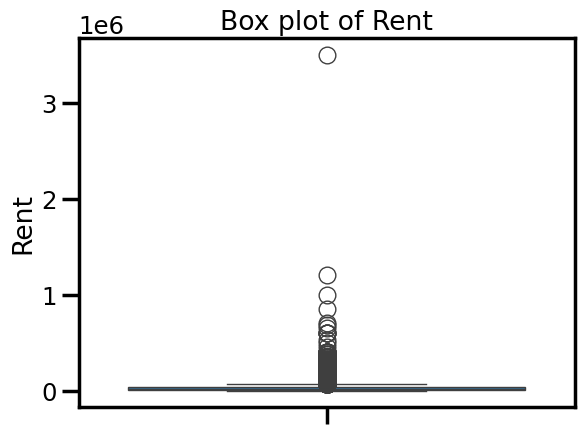

In [27]:
# Box plot to find outliners

sns.boxplot(x=rent_df['BHK'], y=rent_df['Rent'])
plt.title('Box plot')
plt.show()

sns.boxplot(y=rent_df['Rent'])
plt.title('Box plot of Rent')
plt.show()

In [28]:
# Removing Outliners for dependent variable

# Step 1: Calculate Q1, Q3, and IQR
Q1 = rent_df['Rent'].quantile(0.25)
Q3 = rent_df['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
filtered_df = rent_df[(rent_df['Rent'] >= lower_bound) & (rent_df['Rent'] <= upper_bound)]

print("Original DataFrame:")
print(rent_df)
print("\nDataFrame After Removing Outliers:")
print(filtered_df)

Original DataFrame:
      BHK   Rent  Size   Floor    Area Type       City Furnishing Status  \
0       2  10000  1100  Ground   Super Area    Kolkata       Unfurnished   
1       2  20000   800       1   Super Area    Kolkata    Semi-Furnished   
2       2  17000  1000       1   Super Area    Kolkata    Semi-Furnished   
3       2  10000   800       1   Super Area    Kolkata       Unfurnished   
4       2   7500   850       1  Carpet Area    Kolkata       Unfurnished   
...   ...    ...   ...     ...          ...        ...               ...   
4741    2  15000  1000       3  Carpet Area  Hyderabad    Semi-Furnished   
4742    3  29000  2000       1   Super Area  Hyderabad    Semi-Furnished   
4743    3  35000  1750       3  Carpet Area  Hyderabad    Semi-Furnished   
4744    3  45000  1500      23  Carpet Area  Hyderabad    Semi-Furnished   
4745    2  15000  1000       4  Carpet Area  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
0     Bachelors

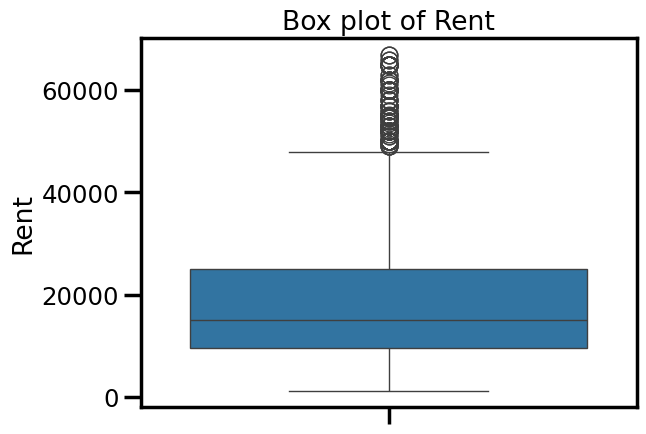

In [29]:
sns.boxplot(y=filtered_df['Rent'])
plt.title('Box plot of Rent')
plt.show()

#### Data Cleaning & Feature Engineering

In [30]:
# Outlier Detection and Removal using Z-score
numerical_features = ['BHK', 'Size', 'Bathroom', 'Rent']
data = rent_df[(np.abs(stats.zscore(rent_df[numerical_features])) < 3).all(axis=1)]
data


,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [31]:
# Missing Value

rent_df.isnull().sum()
# There is no missing value in any of the column

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [32]:
# Find Duplicates

rent_df[rent_df.duplicated()].shape

(95, 10)

In [33]:
rent_df = rent_df.drop_duplicates()
rent_df.duplicated().sum()

0

In [34]:
# Define categorical features (Make sure column names are correct)
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Floor']

# Check if all categorical columns exist before encoding
existing_categorical_features = [col for col in categorical_features if col in rent_df.columns]

if not existing_categorical_features:
    print("⚠️ No categorical columns found! Check column names.")
else:
    print(f"✅ Using these categorical columns for encoding: {existing_categorical_features}")


✅ Using these categorical columns for encoding: ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Floor']


In [35]:
# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(rent_df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
encoded_categorical_df

,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,...,Floor_6,Floor_60,Floor_65,Floor_7,Floor_76,Floor_8,Floor_9,Floor_Ground,Floor_Lower,Floor_Upper
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4647,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4648,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4649,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Combine numerical and encoded categorical features
processed_data = pd.concat([rent_df[numerical_features].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)
processed_data

,BHK,Size,Bathroom,Rent,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,Floor_6,Floor_60,Floor_65,Floor_7,Floor_76,Floor_8,Floor_9,Floor_Ground,Floor_Lower,Floor_Upper
0,2,1100,2,10000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,800,1,20000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1000,1,17000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,800,1,10000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,850,1,7500,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,2,1000,2,15000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4647,3,2000,3,29000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4648,3,1750,3,35000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4649,3,1500,2,45000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Splitting

In [37]:
# Define features and target
X = processed_data
y = np.log1p(rent_df['Rent'])  # Log transformation to handle large Rent values

In [38]:
# Shuffle and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [39]:
# Feature scaling using RobustScaler (resistant to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

## Model Fitting

#### Linear Regression

In [41]:

lr_model = LinearRegression()
lr_rmse, lr_r2 = evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2:", lr_r2)

Linear Regression RMSE: 0.4089527371556144
Linear Regression R2: 0.7985198054627426


#### Ridge Regression

In [42]:
ridge_model = Ridge(alpha=10.0)
ridge_rmse, ridge_r2 = evaluate_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R2:", ridge_r2)

Ridge Regression RMSE: 0.4062666170771254
Ridge Regression R2: 0.801157873717371


#### Lasso Regression

In [43]:

lasso_model = Lasso(alpha=0.1)
lasso_rmse, lasso_r2 = evaluate_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R2:", lasso_r2)

Lasso Regression RMSE: 0.50894972127025
Lasso Regression R2: 0.6879415948375135
